---

# <p style="padding:15px; background-color:#26344e; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 10px 10px">PLAYGROUND SERIES S3E10</p>

---

<blockquote style="margin-right:auto; margin-left:auto; background-color:#26344e; padding: 15px; border-radius: 10px 10px">
    <b><span style="color:#f2f2f0; font-size:20px; font-family:JetBrains Mono; margin-left: 10px;">
        Competition Description 📜
    </span></b>
    <p style="color:#f2f2f0;font-size:16px;font-family:JetBrains Mono; margin-left: 25px; margin-right: 25px; margin-top: 15px; margin-bottom: 20px">
        The dataset for this competition (both train and test) was generated from a deep learning model trained on the <a href="https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction">Pulsar Classification</a>. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.
    </p>
    <b><span style="color:#f2f2f0;font-size:20px;font-family:JetBrains Mono; margin-left: 10px;">
        Task 🕵
    </span></b>
    <p style="color:#f2f2f0;font-size:16px;font-family:JetBrains Mono; margin-left: 25px; margin-right: 25px; margin-top: 15px; margin-bottom: 20px">
        Predict whether the star is a pulsar (1) or not (0).
    </p>
    <b><span style="color:#f2f2f0;font-size:20px;font-family:JetBrains Mono; margin-left: 10px;">
        See More Here 📈
    </span></b>
    <p style="color:#f2f2f0;font-size:16px;font-family:JetBrains Mono; margin-left: 25px; margin-right: 25px; margin-top: 15px; margin-bottom: 20px">
        <a href="https://www.kaggle.com/competitions/playground-series-s3e10">Playground Series S3E10</a>
    </p>
</blockquote>

---

In [226]:
import os
import shutil
import subprocess
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Indicates whether the notebook is running on Kaggle or not.
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None
MODELS_PATH = Path("models")
MODELS_PATH.mkdir(exist_ok=True)  # If directory exists, do nothing.

FONT_COLOR = "#141B4D"
BACKGROUND_COLOR = "#F6F5F5"

MY_RC = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 10,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": 10,
    "ytick.color": FONT_COLOR,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 10,
    "font.family": "Serif",
    "text.color": FONT_COLOR,
}

sns.set_theme(rc=MY_RC)


def download_from_kaggle(competition):
    command = "kaggle competitions download -c "
    filepath = Path("data/" + competition + ".zip")

    if not filepath.is_file():
        subprocess.run((command + competition).split())
        Path("data").mkdir(parents=True, exist_ok=True)
        shutil.unpack_archive(competition + ".zip", "data")
        shutil.move(competition + ".zip", "data")


---

# <p style="padding:15px; background-color:#26344e; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 10px 10px">QUICK LOOK AT DATASET WITH BASIC EDA</p>

---

<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Feature Description <a href="https://www.kaggle.com/competitions/playground-series-s3e10/discussion/392830">See Here</a> 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li><code>Mean_Integrated</code> - This is the mean integrated pulse profile, which measures the average intensity of a pulsar's signal over a period of time.</li>
    <li><code>SD</code> - This is the standard deviation of the integrated pulse profile, which measures the degree of variation in the intensity of the pulsar's signal.</li>
    <li><code>EK</code> - This is the excess kurtosis of the integrated pulse profile, which measures the "peakedness" of the distribution of intensities.</li>
    <li><code>Skewness</code> - This measures the degree of asymmetry in the distribution of intensities in the integrated pulse profile.</li>
    <li><code>Mean_DMSNR_Curve</code> - This is the mean of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.</li>
    <li><code>SD_DMSNR_Curve</code> - This is the standard deviation of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.</li>
    <li><code>EK_DMSNR_Curve</code> - This is the excess kurtosis of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.</li>
    <li><code>Skewness_DMSNR_Curve</code> - This measures the degree of asymmetry in the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.</li>
    <li><code>Class</code> - Class 0 (it is not a pulsar), 1 (it is a pulsar). <b>TARGET.</b></li>
</ul>

<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">What is DM SNR CURVE 📜</p>
<p style="font-size:16px; font-family:JetBrains Mono; margin-right: 15px; margin-left: 15px">Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.</p>

In [227]:
competition = "playground-series-s3e10"

if not ON_KAGGLE:
    download_from_kaggle(competition)
    train_path = "data/train.csv"
    test_path = "data/test.csv"
else:
    train_path = f"/kaggle/input/{competition}/train.csv"
    test_path = f"/kaggle/input/{competition}/test.csv"

train = pd.read_csv(train_path, index_col="id")
test = pd.read_csv(test_path, index_col="id")


In [228]:
train.head()


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [229]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 9.0 MB


<p style="font-size:20px;font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px;font-family:JetBrains Mono; margin-right: 10px;">
    <li>Only eight numerical features, but the dataset is relatively big. There are more than $100000$ samples </li>
    <li>Some models, like <code>SVM</code>, may have a problem here concerning dataset size. We could probably downcast dtypes to <code>float16</code> to accelerate the training process, but it may harm the results.</li>
</ul>


In [230]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,117564.0,111.248300,24.906474,6.054688,104.546875,116.664062,126.296875,189.367188
SD,117564.0,46.713535,6.102941,24.783273,43.443390,47.478932,50.862718,93.602933
EK,117564.0,0.503498,1.127093,-1.730782,0.049761,0.186498,0.395620,7.879628
Skewness,117564.0,1.886385,6.515466,-1.791886,-0.188956,0.091720,0.691613,65.385974
Mean_DMSNR_Curve,117564.0,11.962921,26.719946,0.213211,2.090301,2.808528,4.122910,217.371238
SD_DMSNR_Curve,117564.0,26.190678,20.041937,7.370432,14.955405,18.164924,24.732218,109.890785
EK_DMSNR_Curve,117564.0,8.037488,3.840980,-2.597872,6.742911,8.442883,10.003237,34.539844
Skewness_DMSNR_Curve,117564.0,93.881076,79.962110,-1.976976,49.409136,83.421375,122.093290,1191.000837
Class,117564.0,0.093285,0.290833,0.000000,0.000000,0.000000,0.000000,1.000000


<p style="font-size:20px;font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px;font-family:JetBrains Mono; margin-right: 10px;">
    <li>At first glance, we have outliers here. See the IQR for all features. Between Q1 and Q3 is a slight difference, but between MIN - Q1 and Q3 - MAX, there is a significant difference. In particular, for <code>Skewness_DMSNR_Curve</code>, gaps are enormous. A log-level transformation or <code>RobustScaler</code> will be helpful here probably.</li>
</ul>

In [231]:
features = [
    "Mean_Integrated",
    "SD",
    "EK",
    "Skewness",
    "Mean_DMSNR_Curve",
    "SD_DMSNR_Curve",
    "EK_DMSNR_Curve",
    "Skewness_DMSNR_Curve",
]

print("Train Feature Duplicates:".ljust(30), train.duplicated(subset=features).sum())
print("Test Feature Duplicates:".ljust(30), train.duplicated(subset=features).sum())


Train Feature Duplicates:      0
Test Feature Duplicates:       0


<p style="font-size:20px;font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px;font-family:JetBrains Mono">
    <li>Lack of duplicated samples.</li>
</ul>

In [232]:
print("Train Dataset NaNs:")
print(train.isna().sum())
print()
print("Test Dataset NaNs:")
print(test.isna().sum())


Train Dataset NaNs:
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

Test Dataset NaNs:
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
dtype: int64


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono">
    <li>There are no <code>NULL</code> values present in datasets. Thereby, no imputation is necessary.</li>
</ul>


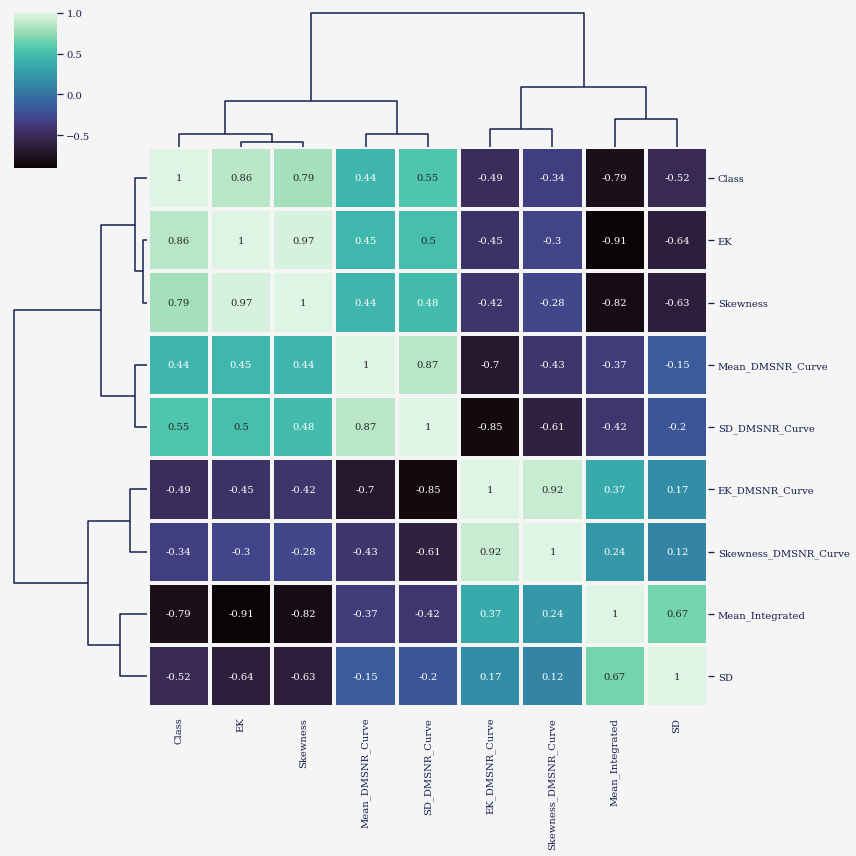

In [233]:
sns.clustermap(
    train.corr(),
    linecolor=BACKGROUND_COLOR,
    linewidth=4,
    annot=True,
    cmap="mako",
    tree_kws={"linewidths": 1.5, "color": "#141B4D"},
    figsize=(12, 12),
)
plt.show()


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono">
    <li>We have several highly correlated pairs here that may be disruptive in linear models due to collinearity. These are:</li>
        <ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
        <li><code>Skewness</code> vs <code>EK</code> &rarr; $0.97$</li>
        <li><code>Skewness_DMSNR_Curve</code> vs <code>EK_DMSNR_Curve</code> &rarr; $0.92$</li>
        <li><code>SD_DMSNR_Curve</code> vs <code>Mean_DMSNR_Curve</code> &rarr; $0.87$</li>
        <li><code>Skewness</code> vs <code>Mean_Integrated</code> &rarr; $-0.82$</li>
        <li><code>SD_DMSNR_Curve</code> vs <code>EK_DMSNR_Curve</code> &rarr; $-0.85$</li>
        <li><code>EK</code> vs <code>Mean_Integrated</code> &rarr; $-0.91$</li>
        </ul>
</ul>

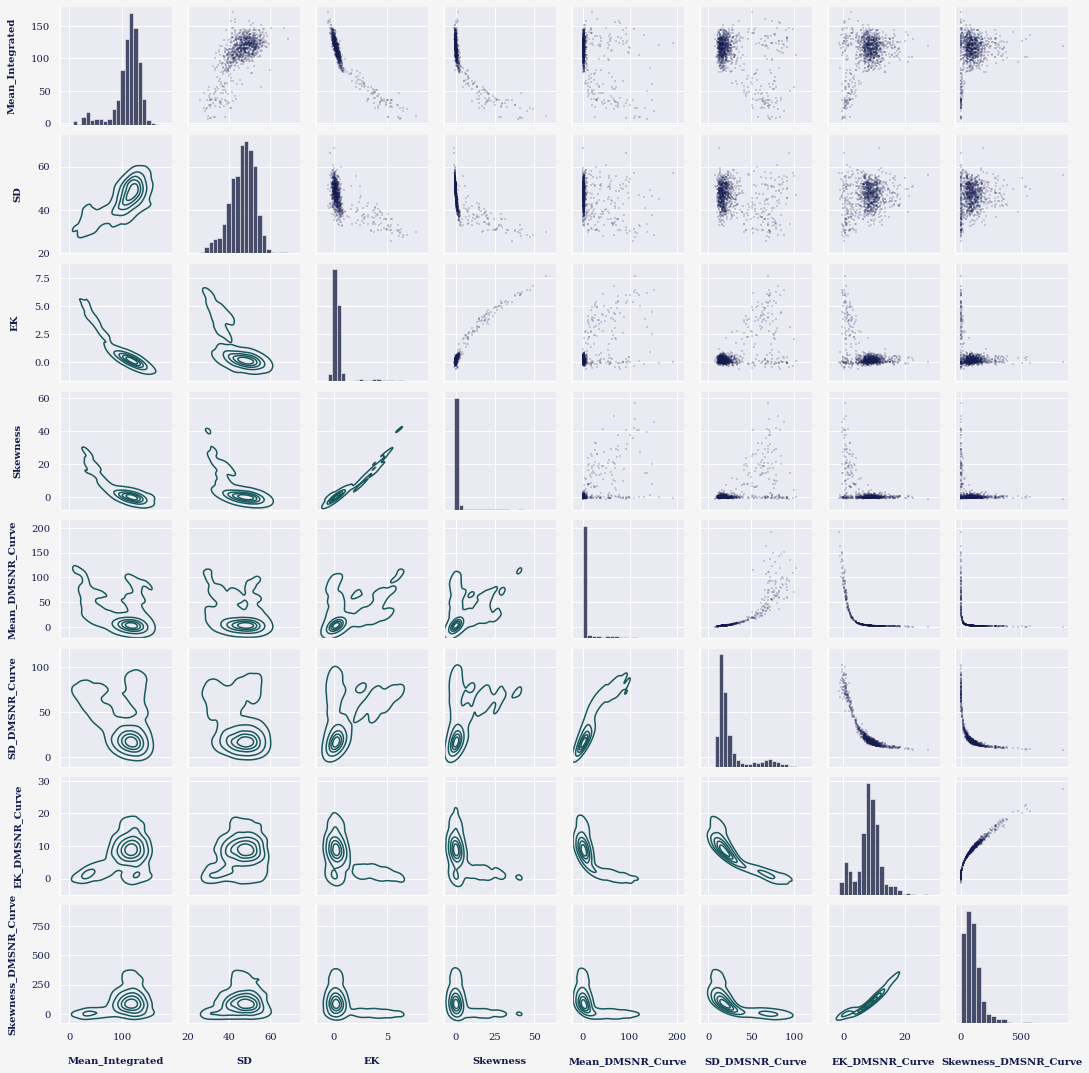

In [234]:
grid = sns.PairGrid(train.drop("Class", axis=1).sample(1000), diag_sharey=False)

grid.fig.set_facecolor(BACKGROUND_COLOR)
grid.fig.set_size_inches(15, 15)

grid.map_upper(sns.scatterplot, color="#141b4d", marker="+", s=5)
grid.map_diag(sns.histplot, color="#0f173b", bins=20)
grid.map_lower(sns.kdeplot, levels=6, color="#17585c")

# for ax in grid.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), rotation=15)
#     ax.set_ylabel(ax.get_ylabel(), rotation=75)
#     ax.yaxis.get_label().set_horizontalalignment("right")

plt.show()


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>The <code>sns.pairplot()</code> is super slow (due to the variance in the data perhaps?), so I've taken only 1000 samples. It's probably enough to get a general idea of the dataset.</li>
    <li>Many pair plots resemble $f(x) \sim exp(-x)$ and $f(x) \sim log(x)$ functions with different coefficients. See for example:</li>
        <ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
        <li><code>EK</code> vs <code>Skewness</code></li>
        <li><code>Mean_DMSNR_Curve</code> vs <code>EK_DMSNR_Curve</code></li>
        <li><code>SD_DMSNR_Curve</code> vs <code>Skewness_DMSNR_Curve</code></li>
        <li><code>EK_DMSNR_Curve</code> vs <code>Skewness_DMSNR_Curve</code></li>
        </ul>
</ul>

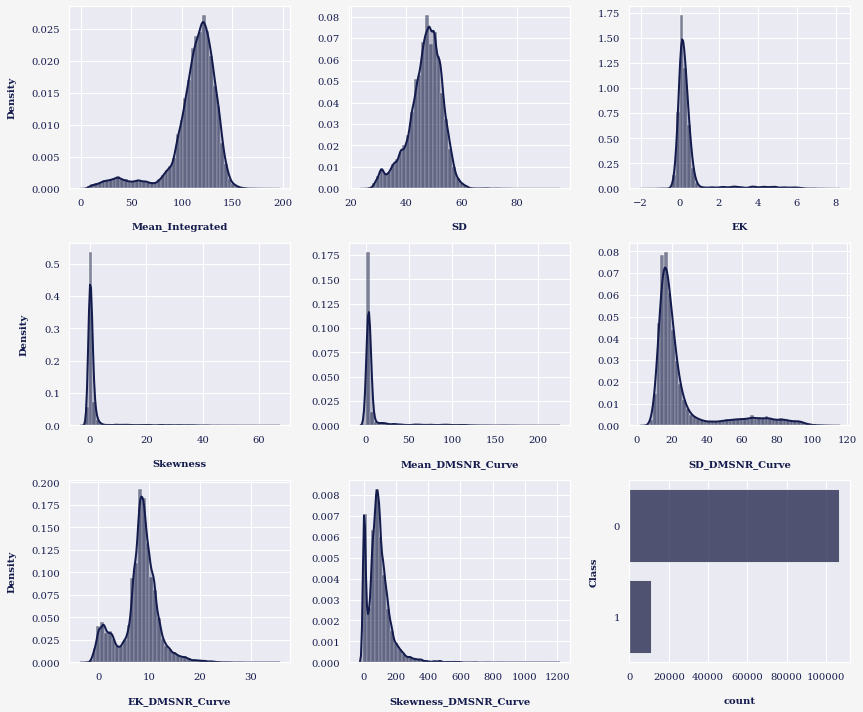

In [235]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), tight_layout=True)

for idx, (feature, ax) in enumerate(zip(features + ["Class"], axes.ravel())):
    plt.sca(ax)
    sns.histplot(x=train[feature], stat="density", color="#0f173b", bins=50, alpha=0.50)
    sns.kdeplot(x=train[feature], fill=True, linewidth=2, color="#141b4d", alpha=0.25)
    if idx == 8:
        sns.countplot(y=train[feature], color="#141b4d", alpha=0.75, orient="v")
    if not idx in (0, 3, 6, 8):
        plt.ylabel("")

plt.show()


In [236]:
train["Class"].value_counts(normalize=True)


0    0.906715
1    0.093285
Name: Class, dtype: float64

<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>Let's see at <code>Skewness</code> and <code>Mean_DMSNR_Curve</code>. Here even the log-level transformation may have a little problem. I think the <code>Binarizer</code> would be fine, or maybe <code>RobustScaler</code>, because there we have negative numbers.</li> 
    <li>Imbalance in the target. About $91$% of observations are not pulsars. Therefore, we have a potential problem because models may be biased towards the majority class (not a pulsar) and may have lower accuracy in identifying a pulsar.</li>
    <li>Since non-pulsars have a higher frequency, a model that predicts non-pulsar for every star will have a lower <code>LogLoss</code> than a model that predicts both types accurately.</li>
    <li>Since it's <code>LogLoss</code> scored competition, it would be fine to consider additional steps such as <a href="https://scikit-learn.org/stable/modules/calibration.html">Probability Calibration</a>.</li>
</ul>

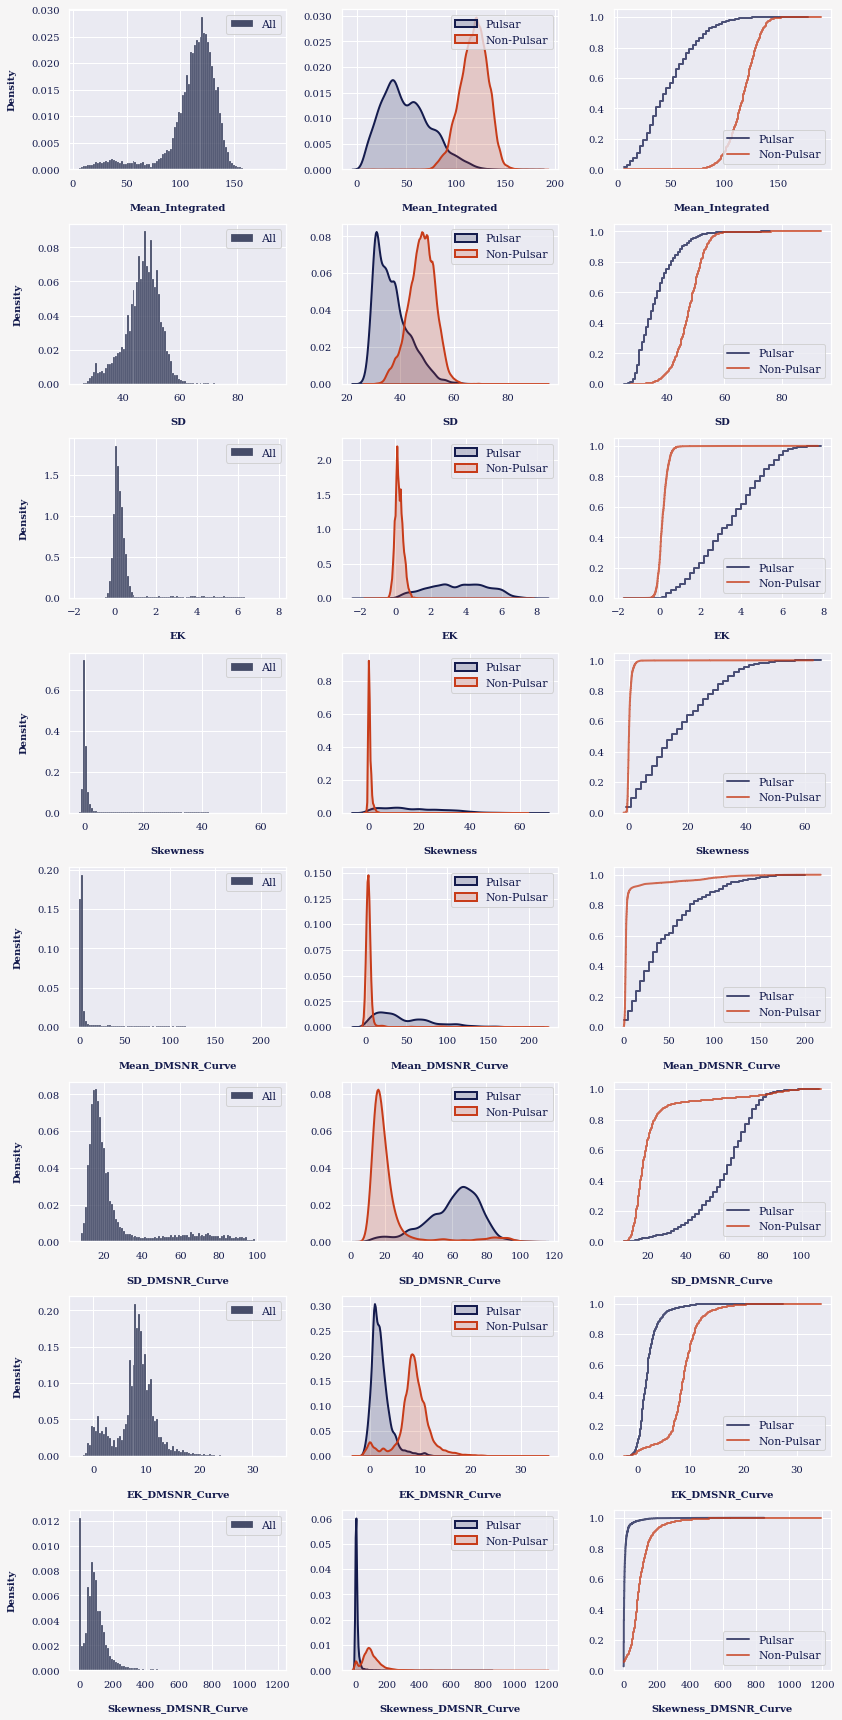

In [237]:
pulsar_mask = train["Class"] == 1

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12, 24), tight_layout=True)

for feature, ax in zip(features, axes):
    full = train[feature]
    pulsar = train.loc[pulsar_mask, feature]
    non_pulsar = train.loc[~pulsar_mask, feature]

    plt.sca(ax[0])
    sns.histplot(
        x=full, stat="density", color="#0f173b", bins=100, alpha=0.75, label="All"
    )
    plt.legend(loc="upper right")

    plt.sca(ax[1])
    sns.kdeplot(
        x=pulsar, fill=True, linewidth=2, color="#141b4d", alpha=0.2, label="Pulsar"
    )
    sns.kdeplot(
        x=non_pulsar,
        fill=True,
        linewidth=2,
        color="#c73c1a",
        alpha=0.2,
        label="Non-Pulsar",
    )
    plt.ylabel("")
    plt.legend(loc="upper right")

    plt.sca(ax[2])
    sns.histplot(
        x=pulsar,
        color="#141b4d",
        linewidth=2,
        alpha=0.75,
        element="step",
        fill=False,
        cumulative=True,
        stat="density",
        label="Pulsar",
    )
    sns.histplot(
        x=non_pulsar,
        color="#c73c1a",
        linewidth=2,
        alpha=0.75,
        element="step",
        fill=False,
        cumulative=True,
        stat="density",
        label="Non-Pulsar",
    )
    plt.legend(loc="lower right")
    plt.ylabel("")

plt.show()


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>And this is so interesting. We can easily see the differences between pulsars and other stars. See, for example:</li>
    <ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
        <li>Pulsars are shifted to lower <code>Mean_Integrated</code> values. The mean for pulsars is around 30, meanwhile for other stars is about 120. It's a four times lower value!</li>
        <li>Similarly, for the <code>SD</code> feature, but here the difference is not so significant.</li>
        <li>On the other hand, for the <code>EK</code>, <code>Skewness</code> and <code>Mean_DMSNR_Curve</code> pulsars distributions are wide-range and are characterised by high variance. Moreover, these are shifted to larger values of these features. </li>
    </ul>
</ul>

In [238]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


lda = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis())
lda.fit(train.drop("Class", axis=1), train["Class"])
lda_weights = np.abs(lda[-1].scalings_.ravel())
lda_weights = lda_weights / lda_weights.sum()

forest = RandomForestClassifier(random_state=42, criterion="entropy")
forest.fit(train.drop("Class", axis=1), train["Class"])
forest_info = forest.feature_importances_

mutual_info = mutual_info_classif(train.drop("Class", axis=1), train["Class"])
mutual_info = mutual_info / np.sum(mutual_info)

feature_names = forest.feature_names_in_

importances = pd.DataFrame(
    [lda_weights, forest_info, mutual_info],
    columns=feature_names,
    index=["LDA", "RandomForestClassifier", "Mutual Information"],
).T

importances = importances.loc[
    importances.sum(axis=1).sort_values(ascending=False).index
]
importances


,LDA,RandomForestClassifier,Mutual Information
EK,0.441039,0.359019,0.164893
Skewness,0.243879,0.200371,0.153825
Mean_Integrated,0.047253,0.158224,0.153933
Skewness_DMSNR_Curve,0.099905,0.067121,0.112859
EK_DMSNR_Curve,0.099210,0.020512,0.107417
SD_DMSNR_Curve,0.018344,0.093109,0.111480
Mean_DMSNR_Curve,0.037881,0.070297,0.107209
SD,0.012489,0.031346,0.088382


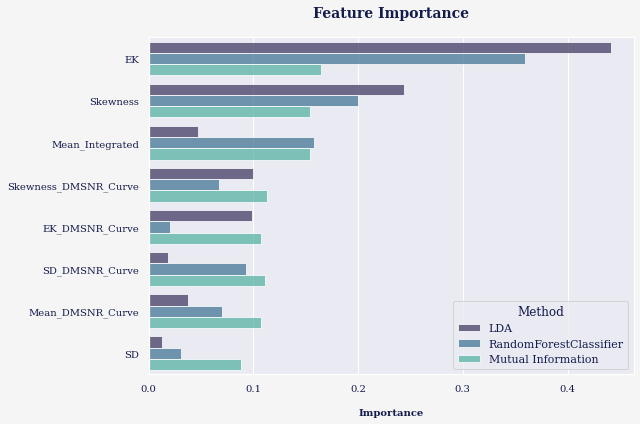

In [260]:
melted = importances.melt(
    var_name="Method", value_name="Importance", ignore_index=False
)

plt.figure(figsize=(9, 6), tight_layout=True)
ax = sns.barplot(
    data=melted,
    x="Importance",
    y=melted.index,
    hue="Method",
    palette="mako",
    alpha=0.75,
)
plt.title("Feature Importance", pad=20)
plt.show()


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>We performed feature importance calculations with three different methods:</li>
    <ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
        <li>If features are normalised, then weights of <code>LDA</code> are measures of attribute relevance - efficient feature selection method.</li>
        <li><code>RandomForestClassifier</code> feature importances are based on the quality of the split.</li>
        <li><code>Mutual Information</code> measures the dependency between the variables. It equals zero if two random variables are independent, and higher values mean higher dependency.</li>
    </ul>
    <li>All coefficients are normalised to 1, so we can easily compare them.</li> 
    <li>All methods agree on two of the most significant features: <code>EK</code> and <code>Skewness</code>.</li>
</ul>

In [240]:
def downcast_dtypes(dataframe):
    downcasted = dataframe.copy()

    fcols = dataframe.select_dtypes(np.float64).columns
    icols = dataframe.select_dtypes(np.int64).columns

    downcasted[fcols] = dataframe[fcols].astype(np.float16)
    downcasted[icols] = dataframe[icols].astype(np.uint8)

    return downcasted


original_df = train.copy()
downcasted_df = downcast_dtypes(original_df)


In [241]:
forest1 = RandomForestClassifier(random_state=42, oob_score=True)
%timeit -r1 forest1.fit(original_df.drop("Class", axis=1), original_df["Class"]);


29.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [242]:
forest2 = RandomForestClassifier(random_state=42, oob_score=True)
%timeit -r1 forest2.fit(downcasted_df.drop("Class", axis=1), downcasted_df["Class"]);


19.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [243]:
print("OOB Score Without Downcasting:".ljust(30), forest1.oob_score_)
print("OOB Score With Downcasting:".ljust(30), forest2.oob_score_)


OOB Score Without Downcasting: 0.9907879963254057
OOB Score With Downcasting:    0.9908135143411249


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>Downcasting will probably be fine. We save time but the result has not changed.</li>
    <li>I've got through several models, and it seems to have performance improvement only in <code>RandomForestClassifier</code>, so we leave it as it is.</li>
</ul>

---

# <p style="padding:15px; background-color:#26344e; font-family:JetBrains Mono; font-weight:bold; color:#f2f2f0; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 10px 10px">MACHINE LEARNING</p>

---

In [244]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


preprocess = make_pipeline(
    # FunctionTransformer(downcast_dtypes, check_inverse=False),
    make_column_transformer(
        (
            RobustScaler(),
            [
                "Mean_Integrated",
                "SD",
                "EK",
                "Skewness",
                "Mean_DMSNR_Curve",
                "SD_DMSNR_Curve",
                "EK_DMSNR_Curve",
                "Skewness_DMSNR_Curve",
            ],
        ),
    ),
)

X_train_full = preprocess.fit_transform(train)
y_train_full = train["Class"]
X_test = preprocess.transform(test)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

training_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
calibration_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=151)


In [245]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier
from lightgbm import early_stopping

PATIENCE = 20


In [246]:
log_reg = LogisticRegression(random_state=42, max_iter=200)
calibrated_svm = CalibratedClassifierCV(
    LinearSVC(C=1e-3, random_state=42), method="isotonic"
)

lgbm = LGBMClassifier(random_state=42, max_depth=4)
etr = ExtraTreesClassifier(random_state=42, min_samples_split=50, criterion="entropy")
hgb = HistGradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.2,
    n_iter_no_change=PATIENCE,
    early_stopping=True,
)

base_scores = {}

for clf in (log_reg, calibrated_svm, lgbm, etr, hgb):
    clf_name = clf.__class__.__name__
    base_scores[clf_name] = -cross_val_score(
        clf,
        X_train,
        y_train,
        cv=training_skf,
        scoring="neg_log_loss",
        n_jobs=-1,
    )

print("Mean Baseline Score within 5-fold CV:")
print("=" * 43)
for name, scores in base_scores.items():
    print(name.ljust(35), f"{scores.mean():.5f}")
print("=" * 43)


Mean Baseline Score within 5-fold CV:
LogisticRegression                  0.03968
CalibratedClassifierCV              0.03739
LGBMClassifier                      0.03223
ExtraTreesClassifier                0.03565
HistGradientBoostingClassifier      0.03341


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>As usual tree-based models are probably the best.</li>
    <li><code>LogisticRegression</code> and <code>CalibratedSVM</code> handle well, too, but I got through several <code>C</code> values, and it seems the above results constitute their max.
</ul>

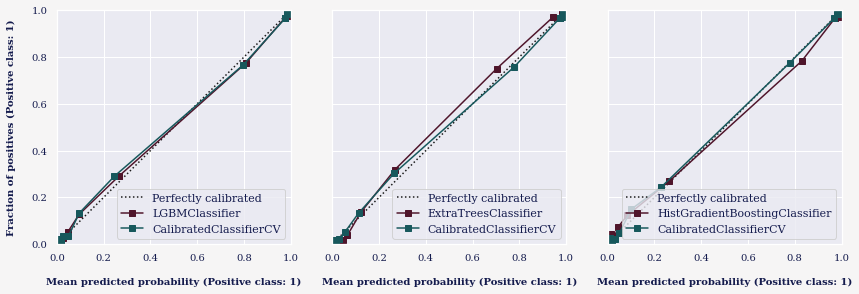

In [261]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
from sklearn.base import clone


fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 6), sharey=True, tight_layout=True
)

cd = CalibrationDisplay

for clf, ax in zip((lgbm, etr, hgb), (ax1, ax2, ax3)):
    clf1 = clone(clf)
    clf2 = CalibratedClassifierCV(clf, cv=calibration_skf, method="isotonic")

    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)

    cd.from_estimator(
        clf1, X_valid, y_valid, n_bins=100, strategy="quantile", ax=ax, color="#4f152b"
    )
    cd.from_estimator(
        clf2, X_valid, y_valid, n_bins=100, strategy="quantile", ax=ax, color="#17585c"
    )
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")

    if not ax == ax1:
        plt.sca(ax)
        plt.ylabel("")


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>We can easily see the calibration with <code>CalibratedClassifierCV</code> can improve classifiers' performance.</li>
    <li>I've noticed the <code>isotonic</code> method handles better than <code>sigmoid</code> in that case.</li>
</ul>

In [248]:
import warnings

from optuna.distributions import FloatDistribution as FloatDist
from optuna.distributions import IntDistribution as IntDist
from optuna.distributions import CategoricalDistribution as CatDist
from optuna.integration import OptunaSearchCV
from optuna.exceptions import ExperimentalWarning
from optuna import logging


logging.set_verbosity(logging.WARNING)
warnings.filterwarnings("ignore", category=ExperimentalWarning)


In [249]:
lgbm_space = {
    "max_depth": CatDist([3, 4, 5]),
    "num_leaves": IntDist(4, 12),
    "n_estimators": IntDist(100, 250, step=25),
    "min_child_weight": FloatDist(1e-2, 1.0, log=True),
    "min_child_samples": IntDist(10, 200, step=10),
    "colsample_bytree": FloatDist(0.75, 0.95),
    "reg_alpha": FloatDist(1e-1, 1e2, log=True),
    "reg_lambda": FloatDist(1e-1, 1e2, log=True),
}
lgbm_opt = OptunaSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_space,
    cv=training_skf,
    n_trials=100,
    n_jobs=-1,
    verbose=0,
    scoring="neg_log_loss",
    error_score="raise",
    random_state=42,
)
lgbm_opt.fit(
    X_train,
    y_train,
    eval_set=(X_valid, y_valid),
    callbacks=[early_stopping(stopping_rounds=PATIENCE, verbose=False)],
)

print("Name:".ljust(25), lgbm_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-lgbm_opt.best_score_:.6f}")
for param, value in lgbm_opt.best_params_.items():
    print(f"{param}:".ljust(25), value)


Name:                     LGBMClassifier
Best Score:               0.031191
max_depth:                4
num_leaves:               10
n_estimators:             250
min_child_weight:         0.09493988622078005
min_child_samples:        190
colsample_bytree:         0.8221839863876735
reg_alpha:                3.713850490435623
reg_lambda:               0.5022563076443154


In [250]:
etr_space = {
    "min_samples_split": IntDist(50, 200, step=10),
    "min_samples_leaf": IntDist(2, 10),
    "max_features": CatDist(["sqrt", "log2"]),
    "max_leaf_nodes": IntDist(200, 600, step=25),
}
etr_opt = OptunaSearchCV(
    estimator=etr,
    param_distributions=etr_space,
    cv=training_skf,
    n_trials=50,
    n_jobs=-1,
    verbose=0,
    scoring="neg_log_loss",
    error_score="raise",
    random_state=42,
)
etr_opt.fit(X_train, y_train)

print("Name:".ljust(25), etr_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-etr_opt.best_score_:.6f}")
for param, value in etr_opt.best_params_.items():
    print(f"{param}:".ljust(25), value)


Name:                     ExtraTreesClassifier
Best Score:               0.033778
min_samples_split:        90
min_samples_leaf:         3
max_features:             log2
max_leaf_nodes:           425


In [251]:
hgb_space = {
    "learning_rate": FloatDist(1e-2, 3e-1, log=True),
    "max_iter": IntDist(50, 200, step=10),
    "max_leaf_nodes": IntDist(4, 16),
    "max_depth": CatDist([3, 4, 5]),
    "min_samples_leaf": IntDist(50, 500, log=True),
    "l2_regularization": FloatDist(1e-1, 1e2, log=True),
}
hgb_opt = OptunaSearchCV(
    estimator=hgb,
    param_distributions=hgb_space,
    cv=training_skf,
    n_trials=75,
    n_jobs=-1,
    verbose=0,
    scoring="neg_log_loss",
    error_score="raise",
    random_state=42,
)
hgb_opt.fit(X_train, y_train)

print("Name:".ljust(25), hgb_opt.best_estimator_.__class__.__name__)
print("Best Score:".ljust(25), f"{-hgb_opt.best_score_:.6f}")
for param, value in hgb_opt.best_params_.items():
    print(f"{param}:".ljust(25), value)


Name:                     HistGradientBoostingClassifier
Best Score:               0.031272
learning_rate:            0.25601815845640946
max_iter:                 190
max_leaf_nodes:           8
max_depth:                4
min_samples_leaf:         58
l2_regularization:        41.92360815093962


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>The improvement is fair enough, I think. Gradient Boosting classifiers use early stopping and are regularised, so everything should be fine in combination with regularised ExtraTrees classifier.</li>
</ul>

In [252]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    [
        ("best_lgbm", lgbm_opt.best_estimator_),
        ("best_etr", etr_opt.best_estimator_),
        ("best_hgb", hgb_opt.best_estimator_),
    ],
    voting="soft",
    n_jobs=-1,
)

calibrated_voting_clf = VotingClassifier(
    [
        (
            "calibrated_best_lgbm",
            CalibratedClassifierCV(
                lgbm_opt.best_estimator_, cv=calibration_skf, method="isotonic"
            ),
        ),
        (
            "calibrated_best_etr",
            CalibratedClassifierCV(
                etr_opt.best_estimator_, cv=calibration_skf, method="isotonic"
            ),
        ),
        (
            "calibrated_best_hgb",
            CalibratedClassifierCV(
                hgb_opt.best_estimator_, cv=calibration_skf, method="isotonic"
            ),
        ),
    ],
    voting="soft",
    n_jobs=-1,
)


In [253]:
from sklearn.metrics import log_loss

voting_scores = -cross_val_score(
    voting_clf,
    X_train,
    y_train,
    cv=training_skf,
    scoring="neg_log_loss",
    n_jobs=-1,
)

calibrated_voting_scores = -cross_val_score(
    calibrated_voting_clf,
    X_train,
    y_train,
    cv=training_skf,
    scoring="neg_log_loss",
    n_jobs=-1,
)

voting_clf.fit(X_train, y_train)
voting_valid_loss = log_loss(y_valid, voting_clf.predict_proba(X_valid))

calibrated_voting_clf.fit(X_train, y_train)
calibrated_voting_valid_loss = log_loss(
    y_valid, calibrated_voting_clf.predict_proba(X_valid)
)

print("Voting Classifier within 80% of the Training Dataset:\n")
print("Mean Score within 5-fold CV:".ljust(30), f"{voting_scores.mean():.5f}")
print("Validation Dataset Score:".ljust(30), f"{voting_valid_loss:.5f}")
print()
print("Calibrated Voting Classifier within 80% of the Training Dataset:\n")
print(
    "Mean Score within 5-fold CV:".ljust(30), f"{calibrated_voting_scores.mean():.5f}"
)
print("Validation Dataset Score:".ljust(30), f"{calibrated_voting_valid_loss:.5f}")


Voting Classifier within 80% of the Training Dataset:

Mean Score within 5-fold CV:   0.03114
Validation Dataset Score:      0.03109

Calibrated Voting Classifier within 80% of the Training Dataset:

Mean Score within 5-fold CV:   0.03114
Validation Dataset Score:      0.03107


<p style="font-size:20px; font-family:JetBrains Mono; border-bottom: 3px solid #26344e">Notes 📜</p>
<ul style="font-size:16px; font-family:JetBrains Mono; margin-right: 10px;">
    <li>Calibration slightly improves the general performance of <code>VotingClassifier</code>.</li>
</ul>

In [254]:
# Let's fit on the whole dataset.
calibrated_voting_clf.fit(X_train_full, y_train_full)

submission = pd.DataFrame(
    {
        "id": test.index,
        "Class": calibrated_voting_clf.predict_proba(X_test)[:, 1],
    }
).set_index("id")

submission.to_csv("submission.csv")
submission.head()


,Class
id,
117564,0.000015
117565,0.001252
117566,0.000087
117567,0.087975
117568,0.002661


---